<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/M%C3%A9todo_de_colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MÉTODO DE COLOCACIÓN

Escribir el problema:


In [27]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x=sp.symbols('x') #introducimos variable
u=sp.Function('u') #esta es una función

In [29]:
ode= u(x).diff(x,x) +u(x)+x # está estructura es un diccionario
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) - x)

In [30]:

sol= sp.dsolve (ode,ics={u(0):0,u(1):0})

In [31]:
sol

Eq(u(x), -x + sin(x)/sin(1))

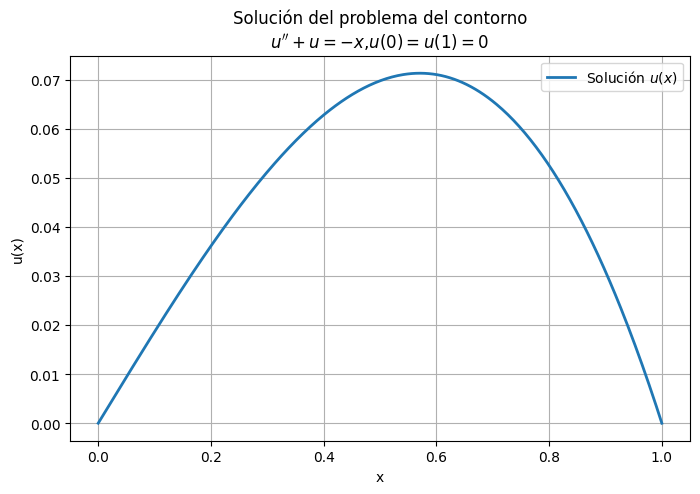

In [32]:
u_expr= sol.rhs
u_num= sp.lambdify (x,u_expr,"numpy")

##################
xx=np.linspace(0,1,400)
yy=u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx,yy,label="Solución $u(x)$",linewidth=2)
plt.title("Solución del problema del contorno\n$u''+u=-x$,$u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

In [33]:
a,b= sp.symbols('a b')

#Funcion de prueba u_n(x) que cumple u(0)=u(1)=0

u_n=a*x*(1-x) + b*x**2*(1-x)

In [34]:
u_n

a*x*(1 - x) + b*x**2*(1 - x)

In [35]:
u_n_2= sp.diff(u_n, x,2)
#derivada
F= u_n_2 +u_n

In [36]:
F # podemos omitir la derivada no es necesaria

a*x*(1 - x) + b*x**2*(1 - x) - 2*(a + 2*b*x + b*(x - 1))

In [37]:
# Puntos de colocación
points=[sp.Rational(1,4), sp.Rational(1,2)]

In [38]:
points

[1/4, 1/2]

In [39]:
eqs= [sp.Eq(F.subs(x,p),-p) for p in points]
# Resolver para a y b
sol_1=sp.solve(eqs,[a,b])

In [40]:
for eq in eqs:
  print(eq)

Eq(-29*a/16 + 35*b/64, -1/4)
Eq(-7*a/4 - 7*b/8, -1/2)


In [41]:
print("Sistema de ecuaciones simbólico:")
for eq in eqs:
  sp.pprint(eq)

Sistema de ecuaciones simbólico:
  29⋅a   35⋅b       
- ──── + ──── = -1/4
   16     64        
  7⋅a   7⋅b       
- ─── - ─── = -1/2
   4     8        


In [42]:
sol_1

{a: 6/31, b: 40/217}

In [43]:
# Sustituir en la función de prueba
u_aprprox= u_n.subs(sol_1)

In [44]:
u_aprprox

40*x**2*(1 - x)/217 + 6*x*(1 - x)/31

In [45]:
u_aprprox_fn=sp.lambdify(x,u_aprprox,"numpy")

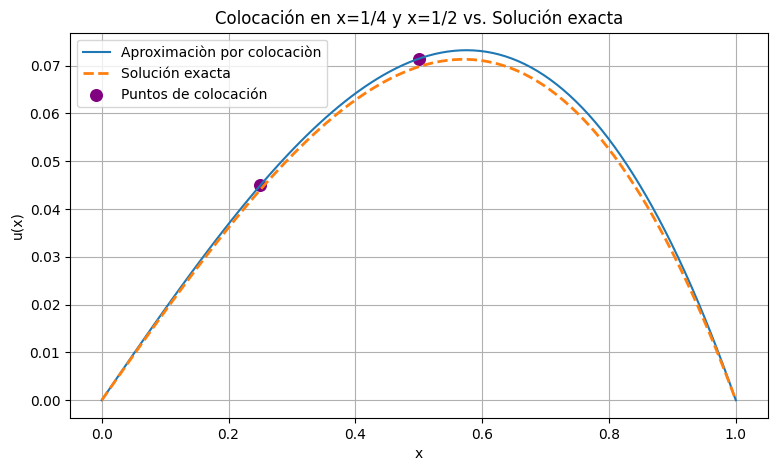

In [49]:
# Solución númerica y analítica

xx=np.linspace(0,1,100)
yy=u_num(xx)
plt.figure(figsize=(9,5))
plt.plot(xx,u_aprprox_fn(xx),label="Aproximaciòn por colocaciòn")
plt.plot(xx,yy,"--",label="Solución exacta",linewidth=2)  #-* tipo de línea

#Puntos de colocación
plt.scatter([0.25,0.5],u_aprprox_fn(np.array([0.25,0.5])),
            color="purple",s=70, label="Puntos de colocación")

plt.title("Colocación en x=1/4 y x=1/2 vs. Solución exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()